In [1]:
# Import libraries

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools 
import numpy as np

In [2]:
# Read in data
jobs_data = pd.read_csv("ds_salaries.csv")

In [3]:
# Preview data
jobs_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
jobs_data["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

Text(0, 0.5, 'Salary (in USD)')

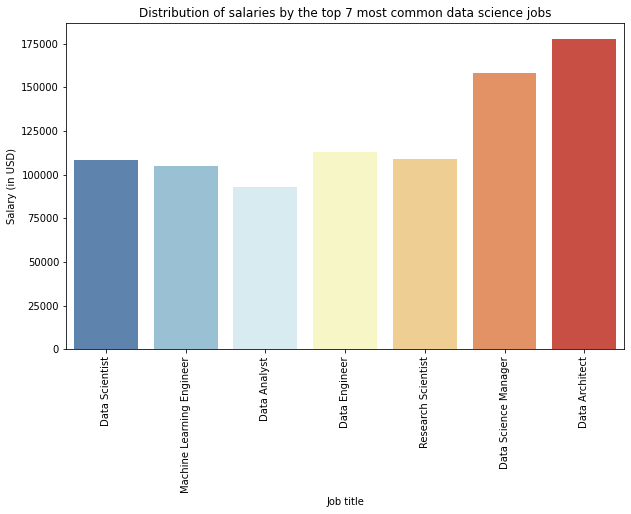

In [5]:
plt.figure(figsize=(10, 6))

subset = jobs_data[
    (jobs_data["job_title"] == "Data Scientist") | 
    (jobs_data["job_title"] == "Data Engineer") |
    (jobs_data["job_title"] == "Data Analyst") |
    (jobs_data["job_title"] == "Machine Learning Engineer") |
    (jobs_data["job_title"] == "Research Scientist") |
    (jobs_data["job_title"] == "Data Science Manager") |
    (jobs_data["job_title"] == "Data Architect")
]


sns.barplot(x = subset["job_title"], y = subset["salary_in_usd"], ci = None, palette = "RdYlBu_r")

plt.xticks(rotation = 90)

plt.title("Distribution of salaries by the top 7 most common data science jobs")

plt.ticklabel_format(style = "plain", axis = "y")

plt.xlabel("Job title")

plt.ylabel("Salary (in USD)")

I filtered the dataset so that only the jobs with at least 10 observations are shown.

From left to right, the number of observations for each job decreases. Data scientist has the most observations, and data architect has the fewest observations.

I made sure to use `salary_in_usd` instead of `salary` to ensure consistent units across observations.

It seems like data scientist, ML engineer, data analyst, data engineer, and research scientist all make roughly around $100,000, while data science manager and data architect make significantly more money.

Text(0.5, -0.25, 'EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level')

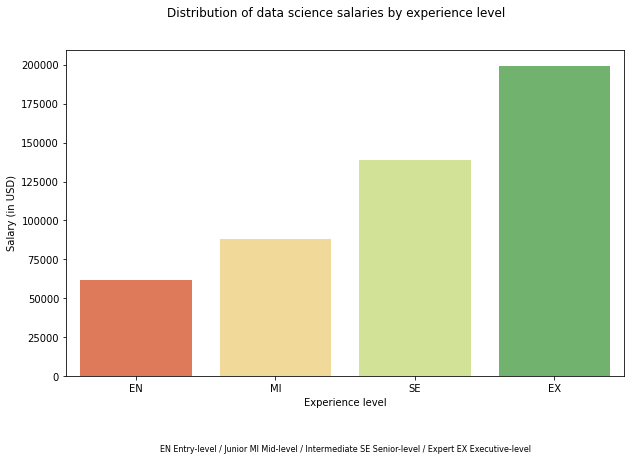

In [6]:
plt.figure(figsize=(10, 6))

order_list = ["EN", "MI", "SE", "EX"]

sns.barplot(x = jobs_data["experience_level"], y = jobs_data["salary_in_usd"], ci = None, palette = "RdYlGn", order = order_list)

plt.suptitle("Distribution of data science salaries by experience level")

plt.xlabel("Experience level")

plt.ylabel("Salary (in USD)")

plt.title("EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level",
         y = -0.25, fontsize = 8)

Text(0.8, 0.4, 'Small: <50 employees \n Medium: 50-250 employees \n Large: >250 employees')

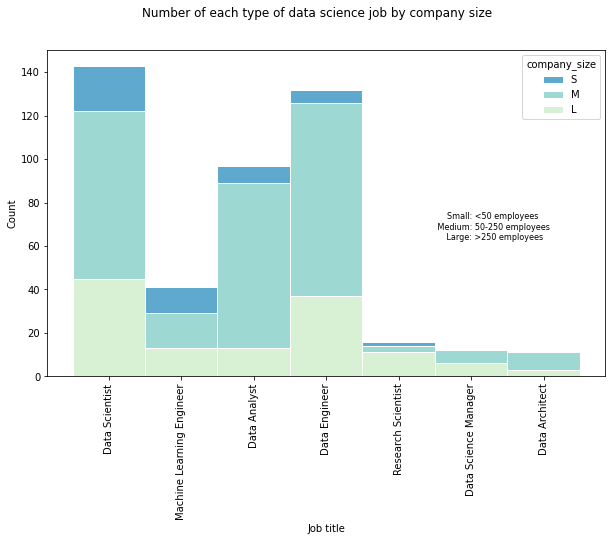

In [7]:
plt.figure(figsize=(10, 6))

hue_order = ["S", "M", "L"]

sns.histplot(data = subset, x = "job_title", hue = "company_size", multiple = "stack", hue_order = hue_order, palette = "GnBu_r", edgecolor = "white")

plt.suptitle("Number of each type of data science job by company size")

plt.xticks(rotation = 90)

plt.xlabel("Job title")

#plt.legend(labels = ["Small", "Medium", "Large"], title = "Company size")

plt.title("Small: <50 employees \n Medium: 50-250 employees \n Large: >250 employees",
         y = 0.4, x = 0.8, fontsize = 8)

Text(0.8, 0.4, 'EN: Entry-level \n MI: Junior Mid-level \n SE: Intermediate Senior-level \n EX: Expert Executive-level')

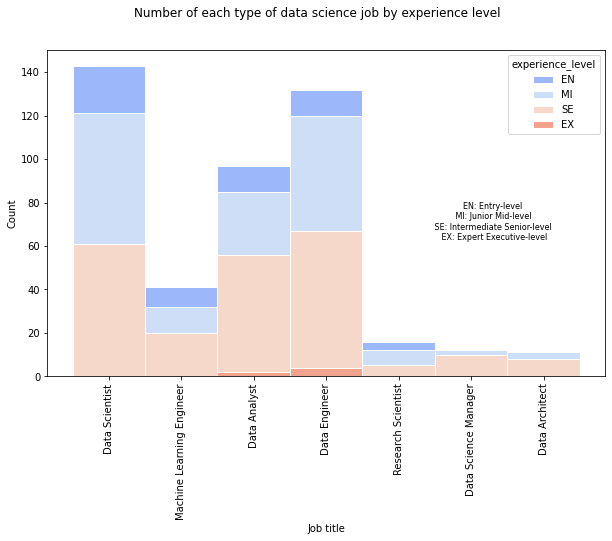

In [8]:
plt.figure(figsize=(10, 6))

hue_order = ["EN", "MI", "SE", "EX"]

sns.histplot(data = subset, x = "job_title", hue = "experience_level", multiple = "stack",  palette = "coolwarm", edgecolor = "white", hue_order = hue_order)

plt.suptitle("Number of each type of data science job by experience level")

plt.xticks(rotation = 90)

plt.xlabel("Job title")

#plt.legend(labels = ["EN", "MI", "SE", "EX"], title = "Experience level")

plt.title("EN: Entry-level \n MI: Junior Mid-level \n SE: Intermediate Senior-level \n EX: Expert Executive-level",
         y = 0.4, x = 0.8, fontsize = 8)

In [9]:
subset2 = subset[["work_year", "job_title", "salary_in_usd"]]

avrg_salaries = subset2.groupby(["work_year", "job_title"]).mean()

avrg_salaries = avrg_salaries.unstack()

#sns.lineplot(data = avrg_salaries, label = "job_title")

#plt.xticks(rotation = 90)

avrg_salaries = pd.DataFrame({
    "Data Scientist": [85970.523810, 70671.733333, 136172.090909],
    "Machine Learning Engineer": [125389.800000, 74611.222222, 129451.944444],
    "Data Analyst": [45547.285714, 79505.411765, 100550.739726], 
    "Data Engineer": [88162.000000, 83202.531250, 126375.696629],
    "Research Scientist": [246000.0, 83003.6, 105569.0],
    "Data Science Manager": [190200.0, 143126.5, 170196.6]
})

avrg_salaries.index = ["2020", "2021", "2022"]

avrg_salaries

,Data Scientist,Machine Learning Engineer,Data Analyst,Data Engineer,Research Scientist,Data Science Manager
2020,85970.523810,125389.800000,45547.285714,88162.000000,246000.0,190200.0
2021,70671.733333,74611.222222,79505.411765,83202.531250,83003.6,143126.5
2022,136172.090909,129451.944444,100550.739726,126375.696629,105569.0,170196.6


In [10]:
avrg_salaries = pd.melt(avrg_salaries)

input_array = pd.array([2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022, 2020, 2021, 2022])

avrg_salaries = pd.DataFrame(data = {"Year": input_array, "Job title": avrg_salaries["variable"], "Salary": avrg_salaries["value"]})

avrg_salaries

,Year,Job title,Salary
0,2020,Data Scientist,85970.523810
1,2021,Data Scientist,70671.733333
2,2022,Data Scientist,136172.090909
3,2020,Machine Learning Engineer,125389.800000
4,2021,Machine Learning Engineer,74611.222222
5,2022,Machine Learning Engineer,129451.944444
6,2020,Data Analyst,45547.285714
7,2021,Data Analyst,79505.411765
8,2022,Data Analyst,100550.739726
9,2020,Data Engineer,88162.000000


Text(0.5, 1.0, 'Average salary for the top 6 most common data science jobs 2020-2022')

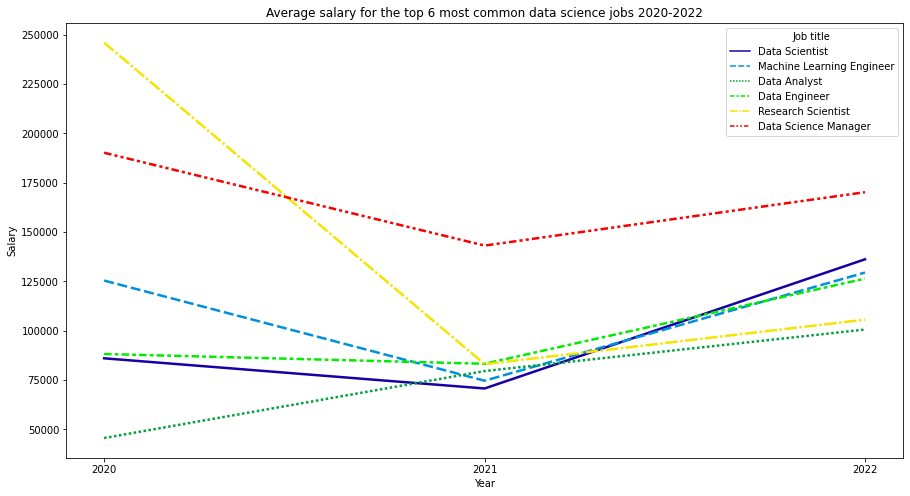

In [11]:
plt.figure(figsize=(15, 8))

sns.lineplot(data = avrg_salaries, x = "Year", y = "Salary", hue = "Job title", style = "Job title", linewidth = 2.5, palette = "nipy_spectral")

plt.xticks(np.arange(2020, 2023, 1.0))

plt.title("Average salary for the top 6 most common data science jobs 2020-2022")

Text(0.85, 0.4, '0: No remote work (<20%) \n 50: Partially remote \n 100: Fully remote (>80%)')

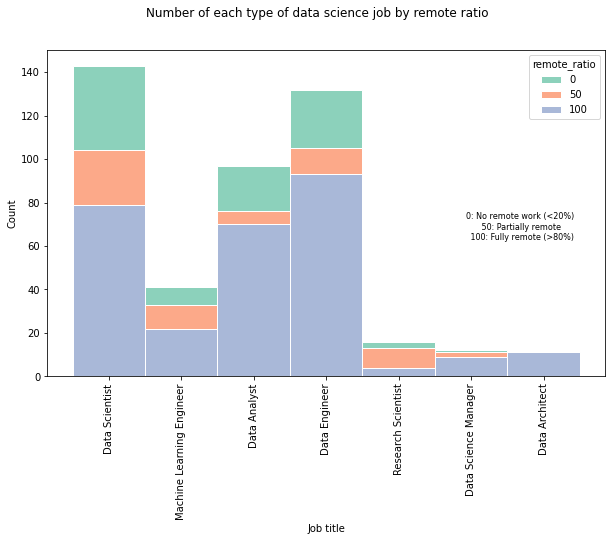

In [12]:
plt.figure(figsize=(10, 6))

hue_order = [0, 50, 100]

sns.histplot(data = subset, x = "job_title", hue = "remote_ratio", multiple = "stack",  palette = "Set2", edgecolor = "white", hue_order = hue_order)

plt.suptitle("Number of each type of data science job by remote ratio")

plt.xticks(rotation = 90)

plt.xlabel("Job title")

#plt.legend(labels = [0, 50, 100], title = "Remote ratio")

plt.title("0: No remote work (<20%) \n 50: Partially remote \n 100: Fully remote (>80%)",
         y = 0.4, x = 0.85, fontsize = 8)

In [13]:
jobs_data["company_location"].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

In [14]:
subset3 = jobs_data[
    (jobs_data["company_location"] == "US") | 
    (jobs_data["company_location"] == "GB") |
    (jobs_data["company_location"] == "CA") |
    (jobs_data["company_location"] == "DE") |
    (jobs_data["company_location"] == "IN") |
    (jobs_data["company_location"] == "FR") |
    (jobs_data["company_location"] == "ES") |
    (jobs_data["company_location"] == "GR")
]

Text(0.5, -0.25, 'US: United States, GB: United Kingdom, CA: Canada, DE: Germany, IN: India, FR: France, ES: Spain, GR: Greece')

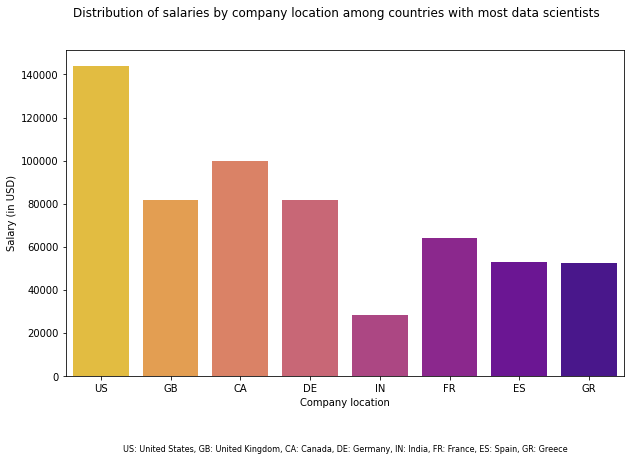

In [15]:
plt.figure(figsize=(10, 6))

order_list = ["US", "GB", "CA", "DE", "IN", "FR", "ES", "GR"]

sns.barplot(x = subset3["company_location"], y = subset3["salary_in_usd"], ci = None, order = order_list, palette = "plasma_r")

plt.suptitle("Distribution of salaries by company location among countries with most data scientists")

plt.xlabel("Company location")

plt.ylabel("Salary (in USD)")

plt.title("US: United States, GB: United Kingdom, CA: Canada, DE: Germany, IN: India, FR: France, ES: Spain, GR: Greece",
         y = -0.25, fontsize = 8)

In [16]:
subset4 = jobs_data[
    ((jobs_data["company_location"] == "US") | 
    (jobs_data["company_location"] == "GB") |
    (jobs_data["company_location"] == "CA") |
    (jobs_data["company_location"] == "DE") |
    (jobs_data["company_location"] == "IN") |
    (jobs_data["company_location"] == "FR") |
    (jobs_data["company_location"] == "ES") |
    (jobs_data["company_location"] == "GR")) &
    ((jobs_data["job_title"] == "Data Scientist") | 
    (jobs_data["job_title"] == "Data Engineer") |
    (jobs_data["job_title"] == "Data Analyst") |
    (jobs_data["job_title"] == "Machine Learning Engineer") |
    (jobs_data["job_title"] == "Research Scientist") |
    (jobs_data["job_title"] == "Data Science Manager") |
    (jobs_data["job_title"] == "Data Architect"))
]

Text(0.85, 0.25, 'US: United States \n GB: United Kingdom \n CA: Canada \n DE: Germany \n IN: India \n FR: France \n ES: Spain \n GR: Greece')

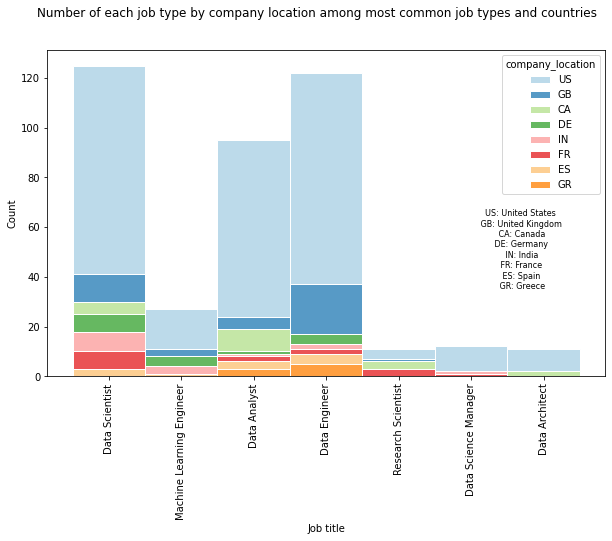

In [17]:
plt.figure(figsize=(10, 6))

order_list = ["US", "GB", "CA", "DE", "IN", "FR", "ES", "GR"]

sns.histplot(data = subset4, x = "job_title", hue = "company_location", multiple = "stack",  palette = "Paired", edgecolor = "white", hue_order = order_list)

plt.xticks(rotation = 90)

plt.suptitle("Number of each job type by company location among most common job types and countries")

plt.xlabel("Job title")

plt.title("US: United States \n GB: United Kingdom \n CA: Canada \n DE: Germany \n IN: India \n FR: France \n ES: Spain \n GR: Greece",
         y = 0.25, x = 0.85, fontsize = 8)